*Unit 1, Sprint 1, Module 3*

---



# Join and Reshape Data 

Helpful Links:
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables

# [Objective 1](#concat) - Concatenate dataframes with pandas
* Stacking sets of rows like LEGOs



# [Objective 2](#merge) - Merge dataframes with Pandas
* Bringing columns together by linking on a variable.

* Similar to SQL there are four types of merges or joins.  We'll focus on the inner join today.


#### The following code changes the built-in display () function to output dataframes as a row. 

In [ ]:

import pandas as pd
import numpy as np

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

### A Simple Example to Start

In [ ]:
df0 = pd.DataFrame({'employee': ['Bob', 'Tanya', 'Jin', 'Harlan'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df1 = pd.DataFrame({'employee': ['Jose', 'Paula'],
                    'group': ['Accounting', 'Engineering']})
df2 = pd.DataFrame({'employee': ['Harlan', 'Bob', 'Jin', 'Tanya', 'Connie'],
                    'hire_date': [2004, 2008, 2012, 2014, 2015]})
display('df0', 'df1')

,employee,group
0,Bob,Accounting
1,Tanya,Engineering
2,Jin,Engineering
3,Harlan,HR
,employee,group
0,Jose,Accounting
1,Paula,Engineering


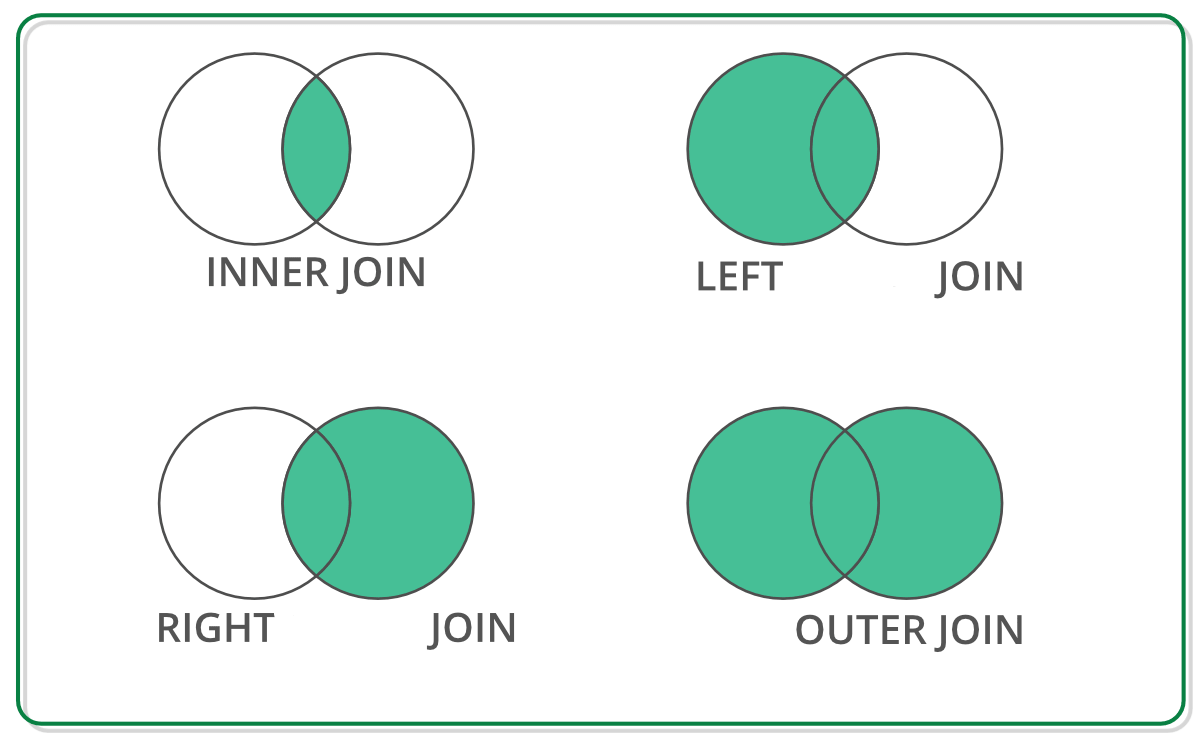

## Follow Along



We’ll work with a subset of the dataset [3 Million Instacart Orders, Open Sourced](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)!




### The first thing we need to do is take a look at each CSV so we can figure out how they relate to each other.

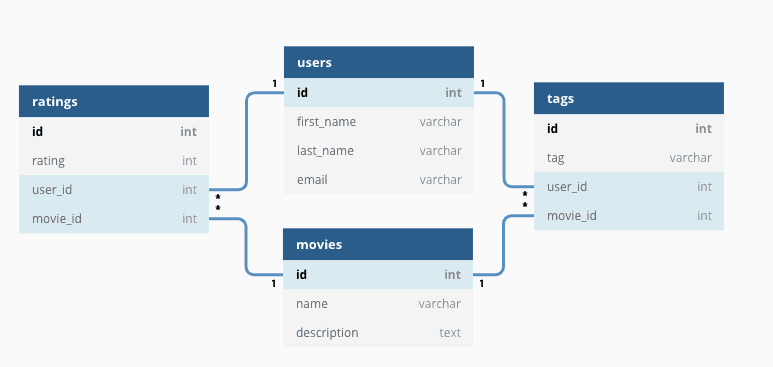

###Let's take a look at each CSV

### order_products__prior


In [ ]:
import pandas as pd

opp_url = 'https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-practice-datasets/main/unit_1/Instacart_small/order_products_prior_sm.csv'

order_products__prior = pd.read_csv(opp_url)

print(order_products__prior.shape)
order_products__prior.head()

(25000, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1696715,34969,11,0
1,2077308,16641,16,0
2,303457,46881,6,0
3,514151,31766,9,0
4,2099209,7908,10,1


### order_products__train




In [ ]:
opt_url = 'https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-practice-datasets/main/unit_1/Instacart_small/order_products_train_sm.csv'

order_products__train = pd.read_csv(opt_url)

print(order_products__train.shape)
order_products__train.head()

(25000, 4)


,order_id,product_id,add_to_cart_order,reordered
0,3178234,22620,2,0
1,2319083,27156,14,0
2,1951854,5818,9,1
3,1615787,40198,13,0
4,1666094,14491,13,0


Order-prducts:


### orders


In [1]:
orders_url = 'https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-practice-datasets/main/unit_1/Instacart_small/orders_sm.csv'

orders = pd.read_csv(orders_url)

print(orders.shape)
orders.head()

NameError: ignored

orders:



### products


In [ ]:
products_url = 'https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-practice-datasets/main/unit_1/Instacart_small/product_names_sm.csv'

products = pd.read_csv(products_url)

print(products.shape)
products.head()

(25000, 4)


,product_id,product_name,aisle_id,department_id
0,45676,Oil Free Acne Stress Control Power Clear Scrub,73,11
1,35408,Soymilk Vanilla Value Size,91,16
2,37442,Vegan Egg,86,16
3,41599,Organic Echinacea Herb Capsules,47,11
4,21994,Premium Saline Nasal Spray,11,11


products:



## Concatenate order_products__prior and order_products__train




In [ ]:
#Concatenate _prior and _train datasets.



## Overview

Before we can continue we need to understand where the data in the above table is coming from and what why specific pieces of data are held in the specific dataframes.

Each of these CSVs has a specific unit of observation (row). The columns that we see included in each CSV were selected purposefully. For example, everything each row of the `orders` dataframe is a specific and unique order -telling us who made the order, and when they made it. Every row in the `products` dataframe tells us about a specific and unique product that thestore offers. And everything in the `order_products` dataframe tells us about how products are associated with specific orders -including when the product was added to the shopping cart. 

### The Orders Dataframe

Holds information about specific orders, things like who/what placed the order.

- user_id
- order_id
- order_number
- order_dow
- order_hour_of_day

### The Products Dataframe

Holds information about individual products.

- product_id
- product_name

### The Order_Products Dataframe

Tells us how products are associated with specific orders since an order is a group of products.

- order_id
- product_id
- add_to_cart_order

As we look at the table that we're trying to recreate, we notice that we're not looking at specific orders or products, but at a specific **USER**. We're looking at the first two orders for a specific user and the products associated with those orders, so we'll need to combine dataframes to get all of this data together into a single table.

**The key to combining all of this information is that we need values that exist in both datasets that we can use to match up rows and combine dataframes.**

#Let's merge all the datasets together.

We want to form a single dataset that contains the following columns:

user id	

order id	

order number	

order dow	

order hour of day	

add to cart order	

product id	product name



### First Merge

1) Combine `orders` and `order_products`

2) We will use the _________ column to match information between the two datasets


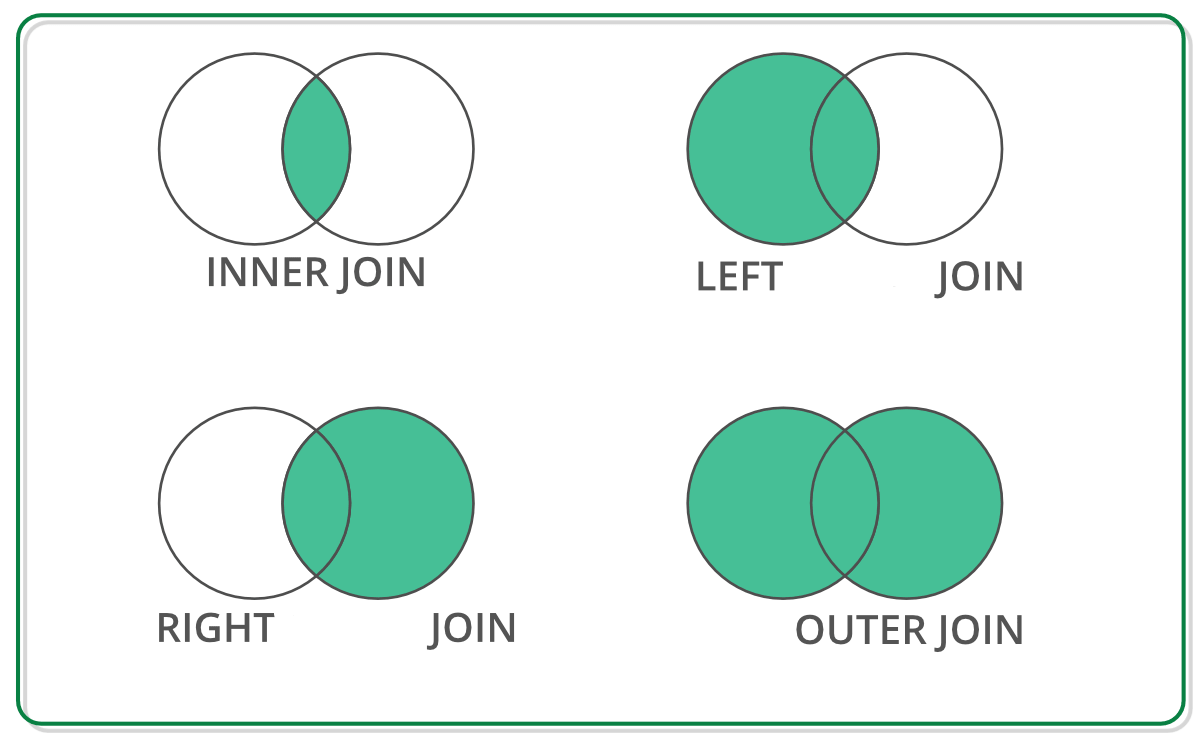

Okay, we're looking pretty good, we're missing one more column `product_name` so we're going to need to merge one more time:

1) Merge `orders_and_products` with `products`

2) Use ___________ as our identifier in both tables


### Some nitpicky cleanup:

#Let's answer some questions using this dataset.

How many unique users are represented here?

How many users ordered only once vs. more than one time?

At what time were most orders placed?

And on what day of the week?

What was the most commonly ordered product?

How many products were ordered more than once?

## Group By 

In [ ]:
data_url = 'https://raw.githubusercontent.com/joqu86/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/master/module3-join-and-reshape-data/data/disneymarathon2020.csv'
disney = pd.read_csv(data_url)
disney.head()

,gender,age,place,group,netTime,minutes,mph
0,M,30,1,M30-34,2:22:19,142.316667,11.053695
1,M,26,2,M25-29,2:27:02,147.033333,10.699105
2,M,32,3,M30-34,2:27:28,147.466667,10.667665
3,M,35,4,M35-39,2:39:20,159.350000,9.872137
4,M,26,5,M25-29,2:44:09,164.166667,9.582487


#### Answer Questions

What are the average times for male and female runners?

What is the average age for male and female runners? 

For each group, what was the fastest time recorded?

### Practice 

In [ ]:
orders= pd.read_csv('https://raw.githubusercontent.com/joqu86/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/master/module3-join-and-reshape-data/data/Sample%20-%20Superstore/Orders.csv', header=1)
people= pd.read_csv('https://raw.githubusercontent.com/joqu86/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/master/module3-join-and-reshape-data/data/Sample%20-%20Superstore/People.csv', header= 1, usecols = [0, 1])
returns= pd.read_csv("https://raw.githubusercontent.com/joqu86/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/master/module3-join-and-reshape-data/data/Sample%20-%20Superstore/Returns.csv", header=1, usecols = [0, 1])



Merge the orders and the people datasets. 

Merge your newly created dataframe to the returns dataframe. We only want to study returns.
*Hint:* The final shape of your dataframe should be (3226, 23).

How many orders, broken down by Segment, were returned?

What was the most expensive product returned?

What customer was responsible for the most returns?

What customer was responsible for the most expensive return? 

# [Objective 3](#tidy) - Learn Tidy Data Format

In tidy data format, every row contains a record of a single observation and each column contains a unique measurement.

One way to check if you have tidy data is to ask: If all the rows of your dataset contain the same types of information.  If yes, then you have tidy data.

Tidy data in much more detail: https://vita.had.co.nz/papers/tidy-data.pdf

